# EPL 12-14th March 2016

Fewer games this weekend as some matches had to take a back seat for the FA Cup. Which once again means that we are in the position that some teams have played a different number of games to other teams. Leicester meanwhile add another three points to their tally taking them closer to an astonishing title.

In [1]:
%matplotlib inline
import league_analysis
from IPython.display import display, HTML
epl = league_analysis.epl
display(HTML(league_analysis.blog_weekly_header(epl, '12/03/2016', '14/03/2016')))

,Home,Away
Team,Bournemouth,Swansea
Goals,3,2
Shots,12,12
SOT,4,4
,Home,Away
Team,Norwich,Man City
Goals,0,0
Shots,5,15
SOT,0,3
,Home,Away


# Bournemouth 3-2 Swansea

What a great game. When we get a 3-2, there are often 2 reasons for it. Either one team, generally the team that has won, has dominated and somehow the dominated team have flattered themselves to score twice. Alternatively, it is a pretty close game that either team could have won. This game appears to have been in the latter category.

It is fairly remarkable that 5 goals have been scored from 8 shots on target. So far in the league there have only been 3 other similar games, two involving West Brom and two involving Everton (and both teams have won one and lost one). Two of these two games have been split-ticket games (in which one team has more total shots but their opponents have more shots on target).

<!-- TEASER_END -->

In [2]:
def qualifying_game(game):
    goals = game.FTHG + game.FTAG
    sots = game.HST + game.AST
    return goals >= 5 and sots <= 8
games = [g for g in epl.matches if qualifying_game(g)]
display(HTML(league_analysis.html_games(games)))

,Home,Away
Team,West Brom,Everton
Goals,2,3
Shots,9,12
SOT,4,4
,Home,Away
Team,Everton,Stoke
Goals,3,4
Shots,15,8
SOT,3,5
,Home,Away


That is now Bournemouth on a run of three victories, equalled by Liverpool and West Ham neither of which played this weekend.

In [3]:
league_analysis.display_current_runs(epl)

Position,Team,Winning Run
1,Bournemouth,3
-,Liverpool,3
-,West Ham,3
4,Leicester,2
5,West Brom,1
-,Southampton,1
-,Tottenham,1
8,Everton,0
-,Norwich,0
-,Chelsea,0


# Norwich 0-0 Manchester City

Last weekend I was stating how I still thought Manchester City were in with a shout of the title. This was definitely a game that would have helped that cause. City certainly should have won it, with 15 shots, given that they only faced 5 none of which were on target. However, City will be pretty disappointed that only 3 of their 15 shots were on target.

On only 10 occassions this season has the away team had at least 10 more shots than their hosts but failed to win.
In four of those games that away team has been Manchester City. No other team has managed this more than once.

In [4]:
def qualifying_game(game):
    shots_diff = game.AS - game.HS
    goals_diff = game.FTHG - game.FTAG
    return goals_diff >= 0 and shots_diff >= 10
games = [g for g in epl.matches if qualifying_game(g)]
display(HTML(league_analysis.html_games(games)))

,Home,Away
Team,Sunderland,Swansea
Goals,1,1
Shots,10,20
SOT,2,9
,Home,Away
Team,Southampton,Leicester
Goals,2,2
Shots,14,26
SOT,6,7
,Home,Away


However, it's not that uncommon for a team to take 15 shots without scoring, Arsenal and Liverpool both managed this feat in the same game.

In [5]:
def qualifying_game(game):
    return (game.HS >= 15 and game.FTHG == 0) or (game.AS >= 15 and game.FTAG == 0)
games = [g for g in epl.matches if qualifying_game(g)]
display(HTML(league_analysis.html_games(games)))

,Home,Away
Team,Arsenal,West Ham
Goals,0,2
Shots,22,8
SOT,6,4
,Home,Away
Team,Southampton,Everton
Goals,0,3
Shots,17,10
SOT,4,4
,Home,Away


# Stoke 1-2 Southampton

A split ticket game. Again this likely reflects the fact that Stoke were behind for 80 minutes of this game. Based on the first half this probably could have been a more comfortable victory for Southampton.

I thought Mark Hughes' post-match interview was a pretty good one, an example of a manager being pretty fair and objective even after a defeat. I don't have any data to back this up, but generally I'm concerned for a team when a manager constantly makes excuses. I think Mark Hughes could be coming into his own as a really top-notch manager. 

Generally speaking quite a lot of positives for both sides here. Though Stoke fans will be pretty concerned about a team rating that is ranked only 14th. Still, it's getting pretty crowded at the top, but I'm going to make a bold prediction for next season. Both of these two teams finish higher than *both* West Ham and Leicester.

# Aston Villa 0-2 Tottenham

Another good win for Tottenham. Still think they are favourites for the title, they are at the very least keeping Leicester very honest.

# Leicester 1-0 Newcastle

Well another good win for Leicester. They are either riding a lot of luck or found a way to make particularly effective chances. They have been out-shot here 10-13, and not only that but shots on target was 1-2, which means that Leicester scored with their only shot on target, an overhead kick at that (hardly what you might call a particularly effective chance).

Leicester scored in the 25th minute and hence played over 2/3rds of the match in the lead, which might explain their lack of ambition. Still this feels unusual for the table-toppers against a team battling relegation.

Here are just some graphs plotting the three metrics, points, team rating and PDO. It's interesting that despite Leicester having the highest PDO, they are still above the trend-line for points-vs-pdo. This somehow means that their high points total cannot be entirely explained by their high PDO.

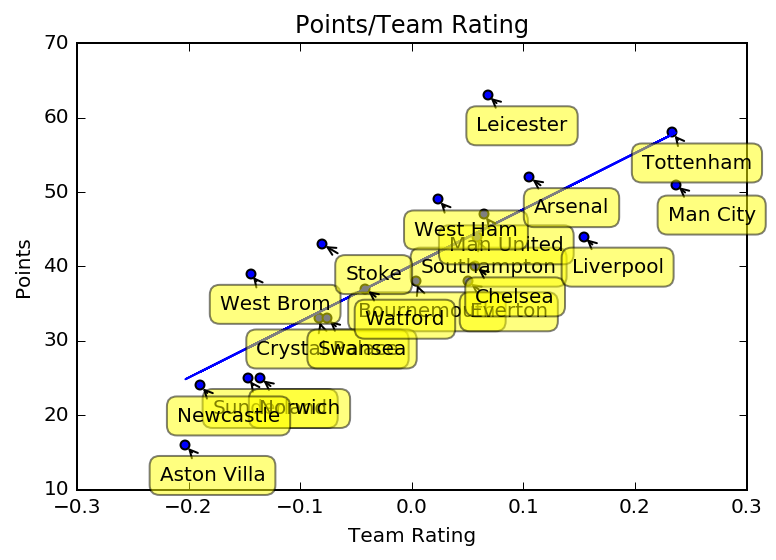

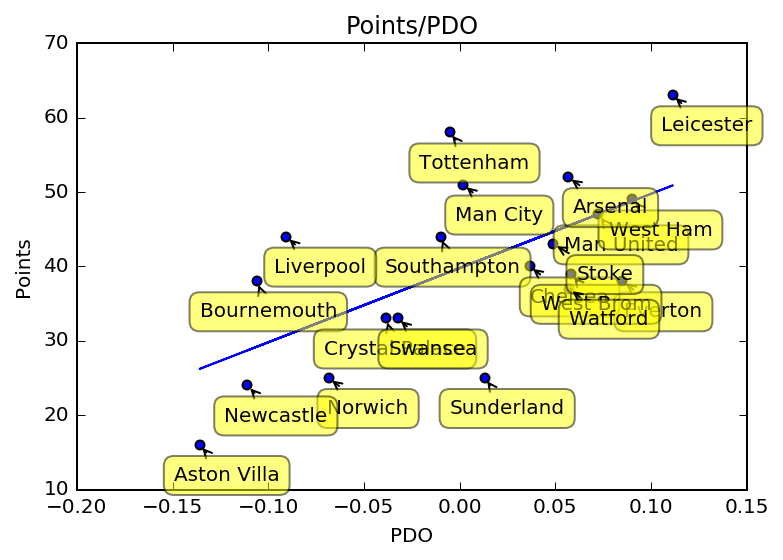

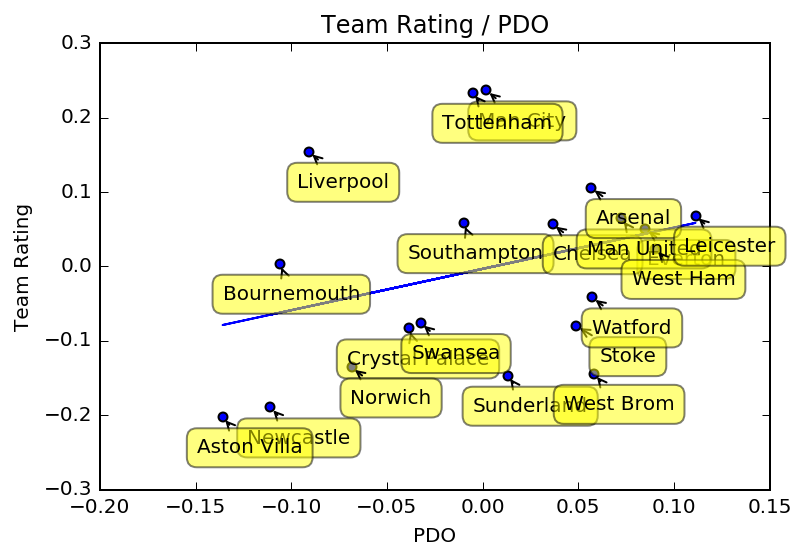

In [6]:
def get_team_rating(league, team):
    return league.team_stats[team].team_rating
def get_points(league, team):
    return league.team_stats[team].points
def get_pdo(league, team):
    return league.team_stats[team].pdo

league_analysis.scatter_stats(epl, get_x_stat=get_team_rating, get_y_stat=get_points,
                              title='Points/Team Rating', ylabel='Points', xlabel='Team Rating')
league_analysis.scatter_stats(epl, get_x_stat=get_pdo, get_y_stat=get_points,
                              title='Points/PDO', ylabel='Points', xlabel='PDO')
league_analysis.scatter_stats(epl, get_x_stat=get_pdo, get_y_stat=get_team_rating,
                              title='Team Rating / PDO', ylabel='Team Rating', xlabel='PDO')

Plotting team rating against PDO does not really mean much, so don't look at the trend line. It's just interesting to see where a team lies on here. For example Aston Villa are both poor and kind of unfortunate, a pretty desparate combination. Bournemouth are an average team that have been unlucky. 


## Back to Leicester

One argument is that Leicester are playing a lot on the break, and hence when counter-attacking they either coming up with a very good chance (or even multiple good chances) or no chance at all. Which means they do not have many low quality chances/shots.

Indeed Leicester are second only to Everton for shot percentage, and this is backed up by a good save percentage as well.

However, if this were the case, one would expect Leicester to conjure up more good chances against Newcastle in game-chasing mode. Playing over an hour behind, you would have expected Newcastle to force the issue at least some, which, you would think, would make them vulnerable to a counter-attack. It seems strange then that Leicester never managed another shot on target.

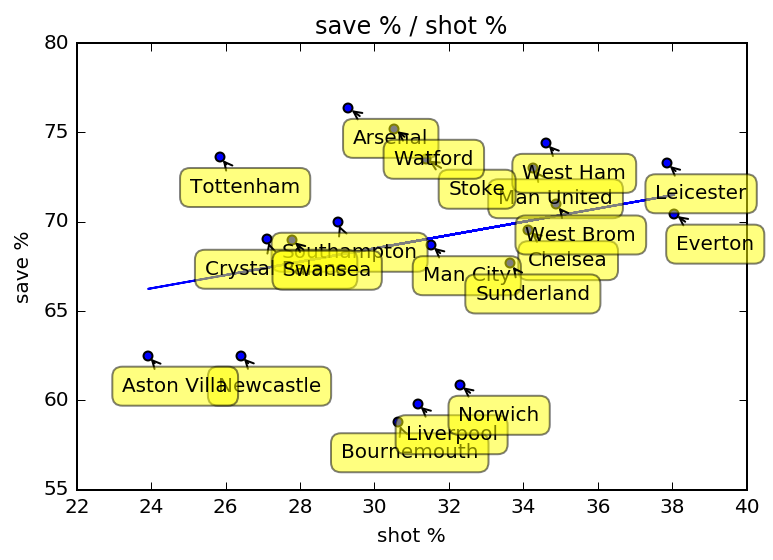

In [10]:
def get_save_percentage(league, team):
    return 100.0 * (1 - league.team_stats[team].goals_sot_against_ratio)
def get_shot_percentage(league, team):
    return 100.0 * league.team_stats[team].goals_sot_for_ratio

league_analysis.scatter_stats(epl, get_x_stat=get_shot_percentage, get_y_stat=get_save_percentage,
                              title='save % / shot %', ylabel='save %', xlabel='shot %')

So in a week of limited action we still have our fair share of mysteries to ponder.

Thanks for reading.